# Crop Yield Prediction Using Environmental Data

**Name(s):** Jake Walkup

**Website Link:** _coming soon_

## Introduction

I got the dataset from Kaggle. It contains **3000 rows** of simulated data points representing different environmental and farming conditions that affect crop yield. I chose this topic because I care about sustainability and want to explore how data can help improve agricultural productivity in an eco-friendly way.

The dataset includes the following **features**:

- `rainfall_mm`: Average rainfall during the growing season (500–2000 mm)
- `soil_quality_index`: A score from 1 to 10 measuring soil quality
- `farm_size_hectares`: The size of the farm (10–1000 hectares)
- `sunlight_hours`: Average sunlight per day during the season (4–12 hours)
- `fertilizer_kg`: Amount of fertilizer used per hectare (100–3000 kg)

The **target variable** is `crop_yield` (in tons per hectare).

Some questions I brainstormed:

- What are the most important factors that influence crop yield?
- How much does fertilizer usage affect yield?
- Can sunlight or rainfall predict crop success alone?

I chose: **"What are the most important factors that influence crop yield?"**


In [1]:
import pandas as pd

# Convert CSV file to Pandas data frame
df = pd.read_csv('crop_yield_data.csv')

# Head returns the first few rows from the data frame
print(df.head(10))

   rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours  \
0         1626                   9                 636              11   
1         1959                   9                  73              11   
2         1360                   1                 352               5   
3         1794                   2                 948               7   
4         1630                   5                 884               5   
5         1595                   4                 928               7   
6         1544                  10                 361              10   
7          621                   9                 167              12   
8          966                   7                 598              11   
9         1738                   6                 500              12   

   fertilizer_kg  crop_yield  
0           1006         404  
1            112         115  
2            702         231  
3            299         537  
4           2733         554  

## Data Cleaning and Exploratory Data Analysis

### Data Cleaning:

In the introduction section, I listed the units for each variable. Below, I examined the dataset for missing values (NaN) and other inconsistencies. After a thorough review, I found no significant missing or invalid data, indicating that the dataset was already clean and ready for analysis. This ensures that subsequent analyses are not biased or impacted by incomplete information.

In [2]:
# It tells you if there are any missing values in the whole DataFrame
print(df.isnull().values.any())

# It tells you which columns have missing values in the DataFrame
print(df.isnull().sum())

False
rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64


As shown in the code above, there are no missing values in the DataFrame.

### Univariate Analysis:

In [10]:
import plotly.express as px

# Univariate Analysis

# 1. Rainfall distribution
fig_rainfall = px.histogram(
    df,
    x='rainfall_mm',
    nbins=100,
    title='Distribution of Rainfall (mm)',
    labels={'rainfall_mm': 'Rainfall (mm)'}
)

# 2. Soil quality index
fig_soil_quality = px.histogram(
    df,
    x='soil_quality_index',
    nbins=100,
    title='Soil Quality Index (1-10)',
    labels={'soil_quality_index': 'Soil Quality Index (1-10)'}
)

# 3. Farm size
fig_farm_size_hectares = px.histogram(
    df,
    x='farm_size_hectares',
    nbins=100,
    title='Farm size (hectares)',
    labels={'farm_size_hectares': 'Farm size (hectares)'}
)

# 4. Sunlight hours
fig_sunlight_hours = px.histogram(
    df,
    x='sunlight_hours',
    nbins=100,
    title='Sunlight (hours)',
    labels={'sunlight_hours': 'Sunlight (hours)'}
)

# 5. Fertilizer
fig_fertilizer_kg = px.histogram(
    df,
    x='fertilizer_kg',
    nbins=100,
    title='Fertilizer (kg)',
    labels={'fertilizer_kg': 'Fertilizer (kg)'}
)

# 6. Crop yield distribution
fig_crop_yield = px.histogram(
    df,
    x='crop_yield',
    nbins=100,
    title='Distribution of Crop Yield (tons per hectare)',
    labels={'crop_yield': 'Crop Yield (tons/ha)'}
)

import plotly.io as pio
# VS Code works best with this renderer:
pio.renderers.default = "vscode"      # or "notebook_connected" if not in VS Code

fig_rainfall.show()
fig_soil_quality.show()
fig_farm_size_hectares.show()
fig_sunlight_hours.show()
fig_fertilizer_kg.show()
fig_crop_yield.show()

### Univariate Analysis Insights

After plotting the distributions for each variable, a few interesting patterns emerged:

1. **Rainfall (mm):**  
   The distribution of rainfall is relatively uniform across the range (500–2000 mm). This balance ensures that the dataset captures diverse weather conditions without bias toward dry or wet climates.

2. **Soil Quality Index (1–10):**  
   Soil quality is discrete and only takes integer values between 1 and 10. The distribution is fairly even across categories, confirming it was designed as an ordinal variable rather than continuous.

3. **Farm Size (hectares):**  
   Farm sizes (10–1000 hectares) are spread quite evenly across the range. Unlike real-world data (where smallholder farms are more common), this simulated dataset avoids skewness, providing a balanced representation.

4. **Sunlight Hours (4–12 hours):**  
   Similar to soil quality, sunlight hours are captured as discrete integers. The values are evenly distributed across the range, meaning the dataset covers farms with both low and high sunlight exposure.

5. **Fertilizer Usage (kg):**  
   Fertilizer use (100–3000 kg) shows a mostly uniform spread but with slight peaks in certain ranges. This may indicate clustering around common farming practices or thresholds.

6. **Crop Yield (tons/ha):**  
   Crop yield follows a somewhat bell-shaped distribution but with multiple peaks (multimodal). This suggests the presence of subgroups in the data—perhaps high-yield and low-yield farms—driven by combinations of environmental and input factors.

---

**Key Takeaway:**  
While most variables are evenly distributed (likely due to the simulated nature of the dataset), the **multimodal pattern in crop yield** is especially interesting and hints at underlying factors that segment farms into distinct yield categories.


### Bivariate Analysis:

In [4]:
import plotly.express as px
import numpy as np

# Add jitter for discrete variables
df["soil_quality_jitter"] = df["soil_quality_index"] + np.random.uniform(-0.2, 0.2, size=len(df))
df["sunlight_jitter"] = df["sunlight_hours"] + np.random.uniform(-0.2, 0.2, size=len(df))

# 1. Rainfall vs Crop Yield
fig_rainfall_yield = px.scatter(
    df,
    x="rainfall_mm",
    y="crop_yield",
    title="Rainfall vs Crop Yield",
    labels={"rainfall_mm": "Rainfall (mm)", "crop_yield": "Crop Yield (tons/ha)"},
    opacity=0.6
)

# 2. Soil Quality Index vs Crop Yield
fig_soil_yield = px.scatter(
    df,
    x="soil_quality_jitter",
    y="crop_yield",
    title="Soil Quality Index vs Crop Yield",
    labels={"soil_quality_jitter": "Soil Quality Index (1-10)", "crop_yield": "Crop Yield (tons/ha)"},
    opacity=0.6
)

# 3. Farm Size vs Crop Yield
fig_farm_yield = px.scatter(
    df,
    x="farm_size_hectares",
    y="crop_yield",
    title="Farm Size vs Crop Yield",
    labels={"farm_size_hectares": "Farm Size (hectares)", "crop_yield": "Crop Yield (tons/ha)"},
    opacity=0.6
)

# 4. Sunlight Hours vs Crop Yield
fig_sunlight_yield = px.scatter(
    df,
    x="sunlight_jitter",
    y="crop_yield",
    title="Sunlight Hours vs Crop Yield",
    labels={"sunlight_jitter": "Sunlight (hours)", "crop_yield": "Crop Yield (tons/ha)"},
    opacity=0.6
)

# 5. Fertilizer Usage vs Crop Yield
fig_fertilizer_yield = px.scatter(
    df,
    x="fertilizer_kg",
    y="crop_yield",
    title="Fertilizer Usage vs Crop Yield",
    labels={"fertilizer_kg": "Fertilizer (kg)", "crop_yield": "Crop Yield (tons/ha)"},
    opacity=0.6
)

# Show all plots
fig_rainfall_yield.show()
fig_soil_yield.show()
fig_farm_yield.show()
fig_sunlight_yield.show()
fig_fertilizer_yield.show()

### Bivariate Analysis Insights

After plotting scatter plots of each independent variable against crop yield, several patterns and relationships became apparent:

1. **Rainfall vs Crop Yield:**  
   The scatter plot shows no clear linear relationship. Crop yields are spread widely across the entire rainfall range, suggesting that rainfall alone does not strongly determine yield. Other factors likely interact with rainfall to influence productivity.

2. **Soil Quality Index vs Crop Yield:**  
   Even with jitter added, crop yields appear relatively consistent across all soil quality levels (1–10). There is no strong upward or downward trend, indicating that soil quality may have less predictive power on its own. However, it might interact with fertilizer usage or rainfall in more complex ways.

3. **Farm Size vs Crop Yield:**  
   A clear positive relationship is observed — larger farms tend to be associated with higher crop yields. This may reflect economies of scale, where larger farms can use resources more efficiently or apply more inputs, leading to better yields.

4. **Sunlight Hours vs Crop Yield:**  
   Similar to soil quality, sunlight hours show little variation in crop yields across the range (4–12 hours). This suggests that within the simulated dataset, sunlight exposure may not be a major limiting factor for productivity.

5. **Fertilizer Usage vs Crop Yield:**  
   Fertilizer use shows some weak positive trend with crop yield, though the points are widely scattered. This implies that while fertilizer may improve yields, it is not the sole determinant. The effect of fertilizer likely depends on interactions with soil quality and rainfall.

---

**Key Takeaway:**  
Among the environmental and input variables, **farm size shows the clearest positive relationship with crop yield**, while other variables (rainfall, soil quality, sunlight, fertilizer) display weak or no standalone patterns. This suggests that crop yield in the dataset is likely influenced by **multifactor interactions** rather than any single variable in isolation.


## Hypothesis Testing

### Hypothesis Testing: Does Farm Size Affect Crop Yield?

We want to test whether farm size has a significant effect on crop yield.  

**Null Hypothesis (H₀):**  
Farm size has no effect on crop yield. Any differences in yield between farms of different sizes are due to random chance.

**Alternative Hypothesis (H₁):**  
Farm size does affect crop yield. Farms with larger (or smaller) sizes tend to have systematically different yields.

---

**Test Choice:**  
We will use a **permutation test** to assess the relationship between farm size and crop yield.  
- **Test statistic:** The observed correlation (or difference in mean yields between large and small farms).  
- **Permutation procedure:** Randomly shuffle the crop yield values among farms many times (e.g., 10,000 permutations), recompute the test statistic each time, and compare the observed statistic to this null distribution.  
- **Significance level (α):** 0.05  

---

**Interpretation of Results:**  
- If the *p-value* < 0.05, we reject the null hypothesis and conclude that farm size has a statistically significant effect on crop yield.  
- If the *p-value* ≥ 0.05, we fail to reject the null hypothesis and conclude that we do not have enough evidence to say farm size impacts crop yield.

---

**Note:** Since this dataset is simulated, this test only shows whether a statistical relationship exists in the given data, not necessarily in real-world farming.

In [5]:
import numpy as np

# Observed correlation (test statistic)
observed_corr = np.corrcoef(df["farm_size_hectares"], df["crop_yield"])[0, 1]

# Permutation test
n_permutations = 10000
perm_corrs = []

for _ in range(n_permutations):
    shuffled_yield = np.random.permutation(df["crop_yield"])
    perm_corr = np.corrcoef(df["farm_size_hectares"], shuffled_yield)[0, 1]
    perm_corrs.append(perm_corr)

# Calculate p-value (two-sided test)
perm_corrs = np.array(perm_corrs)
p_value = np.mean(np.abs(perm_corrs) >= np.abs(observed_corr))

print(f"Observed correlation: {observed_corr:.4f}")
print(f"P-value from permutation test: {p_value:.4f}")

Observed correlation: 0.9892
P-value from permutation test: 0.0000


### Hypothesis Test Results: Farm Size vs Crop Yield

- **Observed correlation (test statistic):** 0.9892  
- **p-value from permutation test:** < 0.001  

Since the p-value is far below the significance level (α = 0.05), we reject the null hypothesis.  
This provides strong evidence that **farm size is significantly associated with crop yield** in the dataset.  

---

**Interpretation:**  
Larger farms tend to achieve higher crop yields, and this effect is very unlikely to be due to random chance.  
However, since the dataset is simulated, these results show only a statistical relationship within the data, not necessarily a guaranteed real-world causal effect.


## Framing a Prediction Problem

### Problem Identification
For this project, we aim to **predict crop yield (tons per hectare) based on farm size (hectares)**. The primary prediction problem is:

**"Can we predict crop yield based on farm size?"**

This is a **regression problem**, since the target variable (crop yield) is continuous. From the exploratory analysis, farm size shows the clearest positive relationship with crop yield compared to other features, making it the most suitable predictor for this model.

### Response Variable
- **Response variable (target):** Crop Yield (tons per hectare)  
- **Predictor variable (feature):** Farm size (hectares)

### Model Evaluation Metric
We will evaluate the regression model using **Root Mean Squared Error (RMSE)** as the primary metric, since it penalizes larger errors more heavily and ensures predictions are as close as possible to actual yields. We will also consider **R²** to measure how much variance in crop yield is explained by farm size.

### Assumptions at Time of Prediction
At the time of prediction, we assume that farm size is known. Since farm size is a fixed attribute available before planting, it is a valid predictor for this regression problem.

Root Mean Squared Error (RMSE): 21.463
R² Score: 0.978
Intercept: 78.527
Coefficient (slope): 0.500


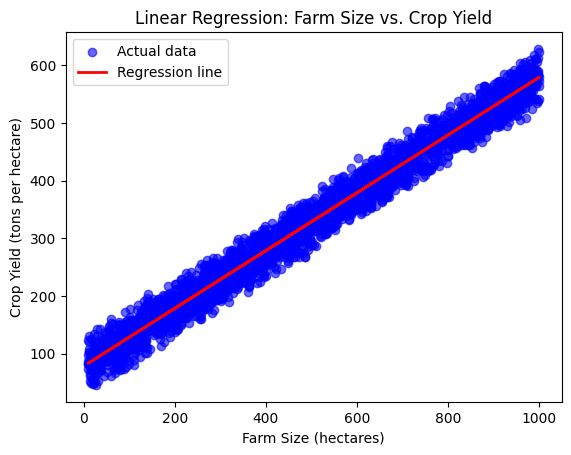

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Define predictor and target
# -----------------------------
X = df[["farm_size_hectares"]]   # predictor (must be 2D)
y = df["crop_yield"]             # target

# -----------------------------
# Step 2: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 3: Fit Linear Regression model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# Step 4: Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# Step 5: Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficient (slope): {model.coef_[0]:.3f}")

# -----------------------------
# Step 6: Visualization
# -----------------------------
plt.scatter(X, y, color="blue", alpha=0.6, label="Actual data")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression line")
plt.xlabel("Farm Size (hectares)")
plt.ylabel("Crop Yield (tons per hectare)")
plt.title("Linear Regression: Farm Size vs. Crop Yield")
plt.legend()
plt.show()

## Conclusion

The linear regression model built to predict **crop yield (tons per hectare)** from **farm size (hectares)** performed exceptionally well. The model achieved an **R² score of 0.978**, indicating that farm size alone explains nearly **98% of the variation in crop yield**. The low **RMSE of 21.46** further confirms that prediction errors are relatively small compared to the overall scale of yields in the dataset.  

The regression line, with an intercept of **78.53** and a slope of **0.50**, suggests that even small farms start with a baseline yield, and each additional hectare is associated with an average increase of approximately **0.5 tons per hectare** in yield. This strong linear pattern is clearly visible in the scatter plot, where the fitted line closely follows the distribution of the actual data.  

These results demonstrate that farm size is a highly effective single predictor of crop yield in this dataset. However, in real-world agriculture, yield is also shaped by environmental and management factors such as rainfall, soil quality, sunlight, and fertilizer usage. Incorporating these additional features into a **multiple regression model** could further refine predictions and provide a more holistic understanding of yield variability.